The target variable 1 or 0 is calculated by observing 18 month window after the latest credit card statement. if the customer doesnt't pay due amount in 120 days their statement is considered in default.

**Target**:

- default ==1

- no default == 0

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set columnns display format
pd.set_option('display.max_columns', None)
# default pandas decimal number display format
pd.options.display.float_format = '{:20,.3f}'.format

In [6]:
df = pd.read_csv('train_data.csv', encoding='latin1', low_memory=False)

In [9]:
target = pd.read_csv('train_labels.csv')

In [10]:
df.shape, target.shape

((5531451, 190), (458913, 2))

In [7]:
df.columns

Index(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41',
       'B_3',
       ...
       'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143',
       'D_144', 'D_145'],
      dtype='object', length=190)

In [8]:
df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938,0.002,0.009,1.007,0.009,0.124,0.009,0.005,NaN,NaN,0.001,0.081,0.709,0.171,0.006,0.359,0.525,0.256,NaN,0.064,0.059,0.006,0.149,1.336,0.008,0.001,0.207,0.736,0.096,NaN,0.023,0.003,0.008,1.002,0.008,0.161,0.148,0.923,0.355,0.152,0.118,0.002,0.159,0.066,0.018,0.064,0.200,0.308,0.016,0.402,0.091,CR,O,0.007,0.008,NaN,0.653,0.009,NaN,0.005,6.000,0.272,0.008,0.515,0.003,0.009,0.005,0.008,0.119,0.005,0.108,0.051,NaN,0.008,0.080,0.069,NaN,0.004,0.008,NaN,0.008,0.000,0.002,0.004,0.001,NaN,0.002,0.004,0.007,0.002,0.002,0.004,0.507,0.008,1.010,0.085,0.004,0.007,0.000,0.006,0.001,0.005,NaN,0.000,0.006,0.007,NaN,0.000,0.009,NaN,1,0.003,0.005,0.007,0.010,0.008,0.002,1.001,0.003,0.007,0.007,1.504,1.006,0.004,0.009,0.004,0.004,0.005,0.894,0.136,0.911,0.975,0.001,0.767,1.009,1.005,0.894,NaN,0.670,0.010,0.005,NaN,1.009,2.000,NaN,0.004,NaN,NaN,NaN,1.007,0.210,0.677,0.008,1.000,0.238,0.000,4.000,0.232,0.236,0.000,0.702,0.434,0.003,0.687,0.009,1.000,1.003,1.008,1.000,0.007,NaN,0.002,0.006,NaN,0.004,0.002,NaN,NaN,NaN,NaN,NaN,0.002,0.004,0.004,NaN,0.001,0.001,0.003
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.937,0.006,0.005,1.001,0.006,0.127,0.001,0.003,NaN,NaN,0.003,0.069,0.713,0.113,0.006,0.354,0.521,0.223,NaN,0.065,0.058,0.002,0.150,1.340,0.008,0.002,0.203,0.721,0.100,NaN,0.031,0.003,0.002,1.009,0.005,0.141,0.144,0.919,0.327,0.156,0.119,0.002,0.148,0.094,0.013,0.066,0.151,0.265,0.018,0.406,0.087,CR,O,0.002,0.007,NaN,0.647,0.002,NaN,0.004,6.000,0.189,0.004,0.509,0.004,0.008,0.001,0.007,0.141,0.000,0.101,0.040,NaN,0.005,0.081,0.074,NaN,0.004,0.005,NaN,0.002,0.001,0.010,0.008,0.001,NaN,0.010,0.000,0.006,0.000,0.001,0.008,0.501,0.001,1.009,0.082,0.000,0.008,0.004,0.002,0.009,0.004,NaN,0.000,0.008,0.007,NaN,0.001,0.006,NaN,1,0.008,0.009,0.002,0.010,0.006,0.002,1.007,0.003,0.007,0.003,1.504,1.006,0.001,0.000,0.008,0.009,0.003,0.902,0.136,0.920,0.976,0.005,0.786,1.000,1.004,0.907,NaN,0.669,0.004,0.005,NaN,1.003,2.000,NaN,0.009,NaN,NaN,NaN,1.008,0.184,0.822,0.003,1.000,0.247,0.000,4.000,0.244,0.242,0.000,0.707,0.431,0.001,0.686,0.001,1.000,1.008,1.004,1.008,0.004,NaN,0.001,0.005,NaN,0.007,0.005,NaN,NaN,NaN,NaN,NaN,0.004,0.003,0.005,NaN,0.010,0.005,0.009
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954,0.092,0.022,1.010,0.007,0.124,0.008,0.009,NaN,NaN,0.008,0.069,0.721,0.060,0.003,0.335,0.525,0.189,NaN,0.067,0.057,0.005,0.152,1.337,0.009,0.007,0.207,0.738,0.134,NaN,0.048,0.010,0.001,1.009,0.007,0.112,0.137,1.002,0.304,0.154,0.115,0.006,0.140,0.085,0.057,0.071,0.306,0.212,0.064,0.407,0.094,CR,O,0.002,0.004,NaN,0.646,0.000,NaN,0.005,6.000,0.495,0.007,0.679,0.001,0.006,0.009,0.003,0.076,0.007,0.103,0.047,NaN,0.007,0.079,0.077,NaN,0.002,0.001,NaN,0.005,0.006,0.010,0.003,0.008,NaN,0.009,0.001,0.005,0.007,0.008,0.009,0.505,0.004,1.004,0.082,0.003,0.004,0.007,0.008,0.002,0.007,NaN,0.000,0.006,0.001,NaN,0.008,0.009,NaN,1,0.007,0.002,0.009,0.008,0.007,0.008,1.001,0.010,0.010,0.005,1.503,1.006,0.007,0.00

In [11]:
df.isnull().sum()

customer_ID          0
S_2                  0
P_2              45985
D_39                 0
B_1                  0
                ...   
D_141           101548
D_142          4587043
D_143           101548
D_144            40727
D_145           101548
Length: 190, dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
P_2,"5,485,466.000",0.656,0.245,-0.459,0.480,0.694,0.865,1.010
D_39,"5,531,451.000",0.153,0.270,0.000,0.005,0.009,0.237,5.390
B_1,"5,531,451.000",0.124,0.212,-7.589,0.009,0.031,0.126,1.324
B_2,"5,529,435.000",0.621,0.401,0.000,0.105,0.814,1.002,1.010
R_1,"5,531,451.000",0.079,0.226,0.000,0.003,0.006,0.009,3.256
...,...,...,...,...,...,...,...,...
D_141,"5,429,903.000",0.165,0.348,0.000,0.003,0.006,0.009,1.340
D_142,"944,408.000",0.391,0.236,-0.015,0.199,0.382,0.559,2.229
D_143,"5,429,903.000",0.179,0.379,0.000,0.003,0.006,0.009,1.010
D_144,"5,490,724.000",0.052,0.183,0.000,0.003,0.006,0.008,1.343


In [13]:
cat_cols = df[['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']]

cont_cols = df.drop(columns=['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68'])

12:18
D_* = Delinquency variables
S_* = Spend variables
P_* = Payment variables
B_* = Balance variables
R_* = Risk variables

In [14]:
D_columns = [col for col in df.columns if 'D_' in col]
len(D_columns)

96

In [15]:
df.filter(like='D_', axis=1).describe()

,D_39,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_58,D_59,D_60,D_61,D_62,D_65,D_66,D_68,D_69,D_70,D_71,D_72,D_73,D_74,D_75,D_76,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_86,D_87,D_88,D_89,D_91,D_92,D_93,D_94,D_96,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_110,D_111,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_132,D_133,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
count,"5,531,451.000","5,529,435.000","791,314.000","3,873,055.000","5,257,132.000","5,529,434.000","4,319,752.000","5,531,451.000","4,812,726.000","545,534.000","2,389,049.000","5,531,451.000","5,501,888.000","1,446,866.000","5,529,435.000","5,346,648.000","2,540,508.000","5,531,451.000","5,424,726.000","5,531,451.000","4,933,399.000","4,773,290.000","5,531,451.000","623,354.000","5,314,948.000","5,336,978.000","5,436,534.000","5,531,451.000","5,507,743.000","55,856.000","5,509,678.000","5,531,451.000","622,497.000","3,017,539.000","5,257,132.000","5,455,512.000","5,509,678.000","5,505,764.000","1,472,837.000","5,336,978.000","5,501,888.000","5,531,451.000","3,865.000","6,004.000","5,501,888.000","5,374,235.000","5,531,451.000","5,531,451.000","5,531,451.000","5,531,451.000","5,490,796.000","5,429,903.000","5,429,903.000","2,510,020.000","541,349.000","5,429,903.000","28,938.000","5,529,854.000","31,334.000","31,334.000","5,528,801.000","5,354,735.000","5,354,735.000","5,354,735.000","5,354,735.000","5,354,735.000","5,354,735.000","5,354,735.000","5,354,735.000","5,354,735.000","5,354,735.000","5,354,735.000","5,354,735.000","5,354,735.000","5,414,635.000","5,531,451.000","5,429,903.000","5,429,903.000","5,429,903.000","5,429,903.000","542,577.000","5,488,735.000","194,699.000","194,699.000","194,699.000","194,699.000","194,699.000","5,429,903.000","5,490,819.000","5,429,903.000","944,408.000","5,429,903.000","5,490,724.000","5,429,903.000"
mean,0.153,0.060,0.185,0.155,0.118,0.252,0.475,0.407,0.382,0.192,0.174,0.145,0.180,0.076,0.985,0.298,0.204,0.216,0.362,0.376,0.430,0.191,0.040,0.990,5.012,0.154,0.111,0.071,0.038,0.156,0.153,0.171,0.141,0.257,0.063,0.069,0.112,0.055,0.458,0.041,0.045,0.037,1.000,0.172,0.006,0.062,0.091,0.015,0.022,0.036,0.190,0.467,0.451,0.370,0.205,0.207,0.071,0.007,0.739,0.875,0.841,0.157,0.619,0.278,0.001,2.319,0.284,0.279,0.117,0.532,0.404,0.051,0.306,0.084,0.739,0.108,0.584,0.440,0.202,0.103,0.210,0.046,0.330,0.030,0.243,0.014,0.165,0.179,0.027,0.165,0.391,0.179,0.052,0.062
std,0.270,0.203,0.228,0.213,0.221,0.243,0.170,0.235,0.326,0.278,0.634,0.242,0.174,0.203,0.141,0.289,0.212,0.260,0.193,0.372,0.525,0.230,0.473,0.100,1.351,16.010,0.228,0.326,0.203,0.205,0.219,0.224,0.290,0.233,0.259,0.220,0.215,0.340,0.190,0.306,0.285,0.177,0.000,0.218,0.019,0.186,0.294,0.100,0.130,0.173,0.275,0.499,0.481,0.251,1.258,0.257,0.322,0.041,0.308,0.269,0.369,0.227,0.486,0.256,0.035,2.289,0.256,0.256,0.321,0.234,0.237,0.246,0.226,0.292,0.538,0.303,0.493,0.496,0.397,0.295,0.248,0.172,0.296,0.156,0.210,0.096,0.267,0.379,0.146,0.348,0.236,0.379,0.183,0.193
min,0.000,0.000,-0.000,0.000,0.000,0.000,-17.289,-0.027,-0.010,0.000,-306.487,0.000,-0.007,0.000,-0.002,0.000,-0.017,0.000,-0.102,0.000,-0.009,-0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.045,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.026,0.000,0.000,0.000,0.000,-0.024,0.000,0.000,0.000,0.000,0.000,0.000,-1.000,0.000,0.000,0.000,-0.032,0.000,0.000,-0.045,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,-0.015,0.000,-0.012,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.015,0.000,0.000,0.000
25%,0.005,0.003,0.038,0.042,0.004,0.055,0.425,0.232,0.081,0.062,0.065,0.004,0.074,0.006,1.002,0.057,0.087,0.006,0.235,0.032,0.092,0.031,0.003,1.000,4.000,0.003,0.003,0.009,0.003,0.056,0.006,0.007,0.015,0.079,0.003,0.003,0.004,0.003,0.502,0.003,0.003,0.003,1.000,0.027,0.003,0.003,0.003,0.

In [16]:
S_columns = [col for col in df.columns if 'S_' in col]
len(S_columns)

22

In [17]:
df.filter(like='S_', axis=1).describe()

,S_3,S_5,S_6,S_7,S_8,S_9,S_11,S_12,S_13,S_15,S_16,S_17,S_18,S_19,S_20,S_22,S_23,S_24,S_25,S_26,S_27
count,"4,510,907.000","5,531,451.000","5,531,451.000","4,510,907.000","5,531,451.000","2,597,808.000","5,531,451.000","5,531,451.000","5,531,451.000","5,531,451.000","5,531,451.000","5,531,451.000","5,531,451.000","5,531,451.000","5,531,451.000","5,512,427.000","5,531,006.000","5,512,858.000","5,518,604.000","5,530,817.000","4,130,516.000"
mean,0.226,0.088,0.244,0.223,0.328,0.074,0.375,0.240,0.255,0.375,0.051,0.040,0.031,0.005,0.017,0.779,0.180,0.735,0.925,0.067,0.278
std,0.193,0.407,0.427,0.206,0.303,0.196,0.191,0.251,0.297,0.195,0.772,0.241,0.161,0.003,0.111,0.719,0.852,0.836,0.207,0.464,0.325
min,-0.627,0.000,0.000,-0.470,0.000,0.000,-0.200,-0.404,0.000,-0.300,0.000,0.000,0.000,0.000,0.000,-91.998,-206.085,-90.484,-2.453,0.000,0.000
25%,0.127,0.006,0.003,0.094,0.008,0.010,0.282,0.187,0.005,0.208,0.003,0.003,0.003,0.003,0.003,0.811,0.133,0.809,0.971,0.003,0.006
50%,0.164,0.014,0.007,0.140,0.322,0.019,0.290,0.191,0.010,0.402,0.005,0.005,0.005,0.005,0.005,0.942,0.136,0.949,0.974,0.007,0.291
75%,0.258,0.071,0.010,0.295,0.495,0.053,0.449,0.209,0.428,0.505,0.008,0.008,0.008,0.008,0.008,0.965,0.139,0.972,0.976,0.011,0.448
max,5.483,206.875,1.010,3.948,1.231,2.840,3.801,175.331,1.010,5.309,231.759,4.049,1.010,1.005,1.010,1.033,885.335,1.056,4.052,136.666,5.456


In [18]:
P_columns = [col for col in df.columns if 'P_' in col]
len(P_columns)

3

In [19]:
df.filter(like='P_', axis=1).describe()

,P_2,P_3,P_4
count,"5,485,466.000","5,229,959.000","5,531,451.000"
mean,0.656,0.601,0.144
std,0.245,0.171,0.338
min,-0.459,-1.520,0.000
25%,0.480,0.541,0.003
50%,0.694,0.618,0.006
75%,0.865,0.684,0.009
max,1.010,2.428,1.269


In [20]:
B_columns = [col for col in df.columns if 'B_' in col]
len(B_columns)

40

In [21]:
df.filter(like='B_', axis=1).describe()

,B_1,B_2,B_3,B_4,B_5,B_6,B_7,B_8,B_9,B_10,B_11,B_12,B_13,B_14,B_15,B_16,B_17,B_18,B_19,B_20,B_21,B_22,B_23,B_24,B_25,B_26,B_27,B_28,B_29,B_30,B_31,B_32,B_33,B_36,B_37,B_38,B_39,B_40,B_41,B_42
count,"5,531,451.000","5,529,435.000","5,529,435.000","5,531,451.000","5,531,451.000","5,531,218.000","5,531,451.000","5,509,183.000","5,531,451.000","5,531,451.000","5,531,451.000","5,531,451.000","5,481,932.000","5,531,451.000","5,524,528.000","5,529,435.000","2,393,853.000","5,531,451.000","5,529,435.000","5,529,435.000","5,531,451.000","5,529,435.000","5,531,451.000","5,531,451.000","5,524,528.000","5,529,435.000","5,529,435.000","5,531,451.000","381,416.000","5,529,435.000","5,531,451.000","5,531,451.000","5,529,435.000","5,531,451.000","5,531,395.000","5,529,435.000","33,632.000","5,531,398.000","5,530,761.000","71,478.000"
mean,0.124,0.621,0.133,0.173,0.083,0.152,0.186,0.451,0.190,0.232,0.111,0.094,0.101,0.101,0.053,0.349,0.715,0.596,0.150,0.236,0.053,0.107,0.171,0.040,0.104,0.091,0.005,0.155,0.033,0.158,0.997,0.027,0.612,0.006,0.123,2.717,0.255,0.203,0.032,0.110
std,0.212,0.401,0.235,0.222,0.397,1.477,0.230,0.497,0.286,4.800,0.208,0.820,0.559,0.284,0.301,0.402,0.387,0.366,0.290,0.374,0.720,0.223,0.229,0.317,0.209,2.588,0.003,0.228,0.277,0.391,0.055,0.148,0.488,0.021,0.212,1.581,0.298,8.081,0.222,0.314
min,-7.589,0.000,0.000,0.000,0.000,-0.005,-2.653,0.000,0.000,-0.003,0.000,0.000,0.000,-8.470,-10.008,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-11.254,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,-7.604,1.000,-0.979,0.000,0.000,0.000
25%,0.009,0.105,0.005,0.028,0.007,0.020,0.028,0.005,0.006,0.029,0.007,0.011,0.009,0.008,0.003,0.006,0.480,0.207,0.003,0.004,0.003,0.003,0.017,0.003,0.006,0.003,0.003,0.027,0.003,0.000,1.000,0.003,0.006,0.003,0.009,2.000,0.058,0.017,0.003,0.007
50%,0.031,0.814,0.010,0.082,0.015,0.083,0.076,0.009,0.026,0.111,0.019,0.019,0.029,0.028,0.006,0.092,0.932,0.647,0.007,0.008,0.005,0.006,0.060,0.005,0.020,0.005,0.005,0.077,0.005,0.000,1.000,0.005,1.002,0.005,0.031,2.000,0.149,0.058,0.005,0.022
75%,0.126,1.002,0.155,0.239,0.054,0.192,0.271,1.004,0.334,0.296,0.102,0.069,0.089,0.100,0.009,0.757,1.002,1.003,0.095,0.358,0.008,0.009,0.247,0.008,0.106,0.008,0.008,0.194,0.008,0.000,1.000,0.008,1.006,0.008,0.124,3.000,0.291,0.245,0.008,0.106
max,1.324,1.010,1.625,19.803,144.207,"1,214.517",1.253,1.019,27.425,"4,097.441",1.970,420.749,276.178,55.012,65.037,1.010,1.010,1.010,1.010,1.010,288.294,3.508,1.693,46.607,15.700,"1,499.220",1.005,25.533,12.024,2.000,1.000,1.010,1.010,1.002,1.328,7.000,2.061,"5,755.076",22.005,9.052


In [22]:
R_columns = [col for col in df.columns if 'R_' in col]
len(R_columns)

28

In [23]:
df.filter(like='R_', axis=1).describe()

,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9,R_10,R_11,R_12,R_13,R_14,R_15,R_16,R_17,R_18,R_19,R_20,R_21,R_22,R_23,R_24,R_25,R_26,R_27,R_28
count,"5,531,451.000","5,531,451.000","5,531,451.000","5,531,451.000","5,531,451.000","5,531,451.000","5,531,450.000","5,531,451.000","312,533.000","5,531,451.000","5,531,451.000","5,531,395.000","5,531,451.000","5,531,450.000","5,531,451.000","5,531,451.000","5,531,451.000","5,531,451.000","5,531,451.000","5,531,376.000","5,531,451.000","5,531,451.000","5,531,451.000","5,531,451.000","5,531,451.000","609,305.000","5,402,748.000","5,531,451.000"
mean,0.079,0.048,0.121,0.031,0.035,0.059,0.088,0.038,0.230,0.065,0.051,0.979,0.005,0.241,0.020,0.059,0.005,0.005,0.023,0.037,0.022,0.009,0.005,0.019,0.008,0.085,0.894,0.006
std,0.226,0.202,0.211,0.160,0.257,0.642,1.551,0.304,0.189,0.306,0.176,0.154,0.007,8.356,0.123,0.239,0.006,0.003,0.132,0.378,0.128,0.060,0.017,0.117,0.057,0.244,0.312,0.027
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.092,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.026,0.000
25%,0.003,0.003,0.005,0.003,0.003,0.003,0.003,0.003,0.169,0.003,0.003,1.002,0.003,0.003,0.003,0.003,0.003,0.002,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.005,1.002,0.003
50%,0.006,0.005,0.009,0.005,0.005,0.005,0.005,0.005,0.173,0.005,0.005,1.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.037,1.004,0.005
75%,0.009,0.008,0.200,0.008,0.008,0.008,0.008,0.008,0.176,0.008,0.008,1.007,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.077,1.007,0.008
max,3.256,1.010,11.603,1.010,35.005,14.448,449.989,38.008,1.510,21.004,12.503,1.010,1.005,"4,837.305",1.010,18.500,1.002,1.001,1.010,45.006,1.010,1.010,1.010,1.010,1.010,9.509,1.010,1.010


In [20]:
df.customer_ID.nunique()

458913

***

In [24]:
df.R_1.isna().sum()

0

In [25]:
list = [df.customer_ID.nunique]

In [26]:
list

[<bound method IndexOpsMixin.nunique of 0          0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...
 1          0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...
 2          0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...
 3          0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...
 4          0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...
                                  ...                        
 5531446    fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...
 5531447    fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...
 5531448    fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...
 5531449    fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...
 5531450    fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...
 Name: customer_ID, Length: 5531451, dtype: object>]

In [27]:
customer_df = df['customer_ID'].copy()

In [28]:
customer_df_1 = pd.DataFrame(customer_df)

In [29]:
customer_df_1.head()

,customer_ID
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...


In [30]:
customer_df_1['r1_mean'] = df.groupby('customer_ID').R_1.mean()

In [31]:
customer_df_1.head()

,customer_ID,r1_mean
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,NaN
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,NaN
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,NaN
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,NaN
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,NaN


In [32]:
# Create new df which is grouped by customer id
cust_df = pd.DataFrame(df.groupby(df['customer_ID']))

In [45]:
cust_df.head()

,0,1
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,cust...
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,cust...
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,cust...
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,cust...
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,cust...


In [44]:
cust_df.shape

(458913, 2)

In [24]:
#checking col names
target.columns

Index(['customer_ID', 'target'], dtype='object')

***

In [26]:
# Checking default customers who default

target.target.value_counts()

0    340085
1    118828
Name: target, dtype: int64

In [33]:
# Joining target variable to df
target.columns

Index(['customer_ID', 'target'], dtype='object')

In [38]:
label_stats = pd.DataFrame({'absolute': target.target.value_counts(),
                            'relative': target.target.value_counts() / len(target)})
label_stats['absolute upsampled'] =  label_stats.absolute * np.array([20, 1])
label_stats['relative upsampled'] = label_stats['absolute upsampled'] / label_stats['absolute upsampled'].sum()
label_stats

,absolute,relative,absolute upsampled,relative upsampled
0,340085,0.741,6801700,0.983
1,118828,0.259,118828,0.017


<AxesSubplot:xlabel='target', ylabel='count'>

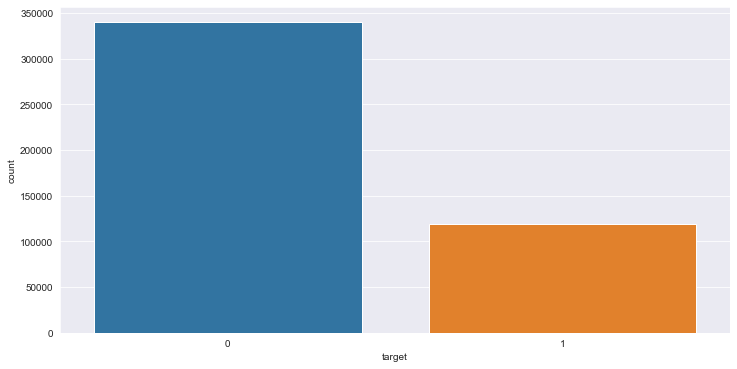

In [53]:
plt.figure(figsize = (12,6))
sns.countplot(x='target', data = target)

After looking at target variable distribution, we see a **class imbalance.**

***

In [54]:
test_df = pd.read_csv('test_data.csv')

In [55]:
test_df.shape

(11363762, 190)

In [57]:
test_df.columns

Index(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41',
       'B_3',
       ...
       'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143',
       'D_144', 'D_145'],
      dtype='object', length=190)

In [58]:
print('Train statement dates: ', df.S_2.min(), df.S_2.max(), df.S_2.isna().any())
print('Test statement dates: ',  test_df.S_2.min(), test_df.S_2.max(), test_df.S_2.isna().any())

Train statement dates:  2017-03-01 2018-03-31 False
Test statement dates:  2018-04-01 2019-10-31 False


- The test data come from a different phase in the economic cycle than the training data. Our models have no way of learning the effect of the economic cycle.
- The customers from test data are split in two [detials here](https://www.kaggle.com/code/taran8727/exploration-time-periods-and-credit-defaults):
    - 2019-04-01 467966 - 50.6%
    - 2019-10-01 456655 - 49.4%

### How many statements do customer have?

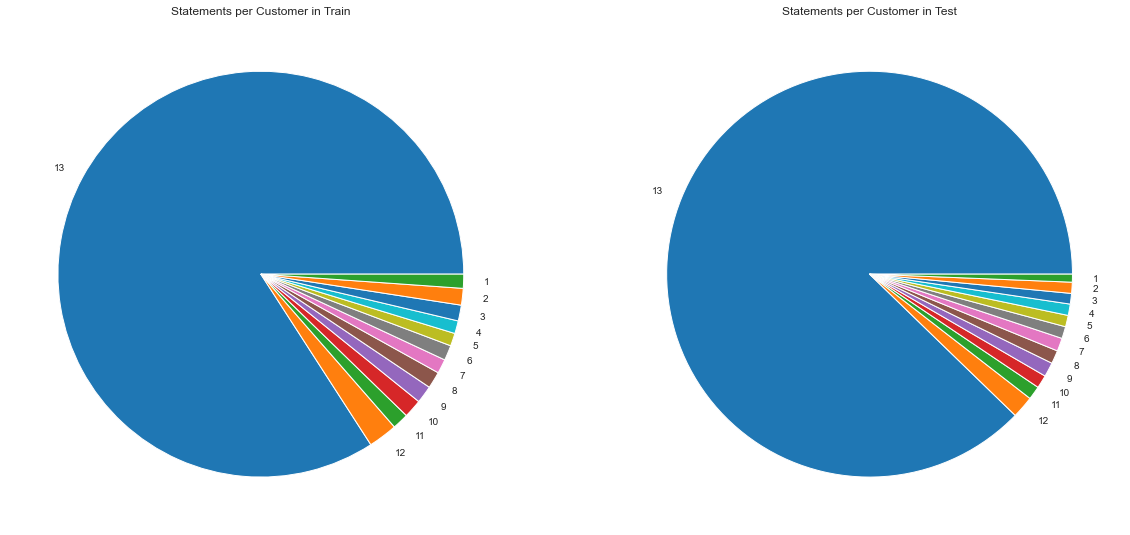

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
train_sc = df.customer_ID.value_counts().value_counts().sort_index(ascending=False).rename('Statements per Customer in Train')
ax1.pie(train_sc, labels=train_sc.index)
ax1.set_title(train_sc.name)
test_sc = test_df.customer_ID.value_counts().value_counts().sort_index(ascending=False).rename('Statements per Customer in Test')
ax2.pie(test_sc, labels=test_sc.index)
ax2.set_title(test_sc.name)
plt.show()

**Most customers have 13 statements.**

### Distribution of 3 datasets.

In [68]:
df['S_2'] = pd.to_datetime(df['S_2'])

In [71]:
test_df['S_2'] = pd.to_datetime(test_df['S_2'])

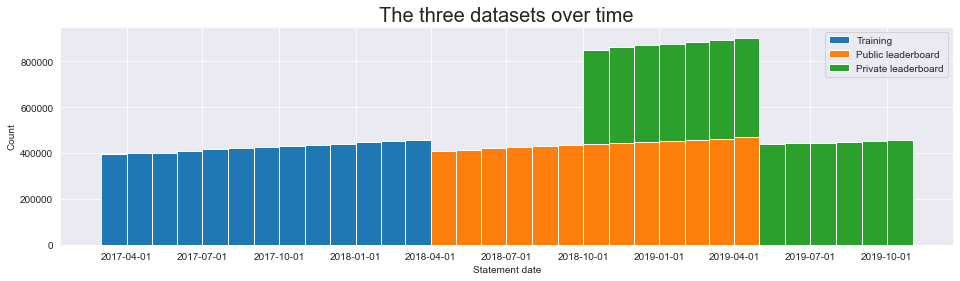

In [72]:
temp = pd.concat([df[['customer_ID', 'S_2']], test_df[['customer_ID', 'S_2']]], axis=0)
temp.set_index('customer_ID', inplace=True)
temp['last_month'] = temp.groupby('customer_ID').S_2.max().dt.month
last_month = temp['last_month'].values

plt.figure(figsize=(16, 4))
plt.hist([temp.S_2[temp.last_month == 3],   # ending 03/18 -> training
          temp.S_2[temp.last_month == 4],   # ending 04/19 -> public lb
          temp.S_2[temp.last_month == 10]], # ending 10/19 -> private lb
         bins=pd.date_range("2017-03-01", "2019-11-01", freq="MS"),
         label=['Training', 'Public leaderboard', 'Private leaderboard'],
         stacked=True)
plt.xticks(pd.date_range("2017-03-01", "2019-11-01", freq="QS"))
plt.xlabel('Statement date')
plt.ylabel('Count')
plt.title('The three datasets over time', fontsize=20)
plt.legend()
plt.show()

**Train and test don't overlap. Public and private periods overlap.**